In [ ]:
import jetnet
from jetnet.datasets import JetNet
import numpy as np
import matplotlib.pyplot as plt
import gen_metrics
from tqdm import tqdm
import pandas as pd
from IPython.display import Markdown, display
import pickle
import plotting
from typing import OrderedDict

plt.rcParams.update({"font.size": 16})


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os

plot_dir = "../plots/fgd_inf/Nov5"
_ = os.system(f"mkdir -p {plot_dir}")

data_dir = "/Users/raghav/Downloads/"

In [ ]:
gen_jets = np.load(f"{data_dir}/best_epoch_gen_jets-2.npy")
gen_efps = jetnet.utils.efps(gen_jets, efpset_args=[("d<=", 4)])
real_efps = np.load(f"{data_dir}/t.npy")


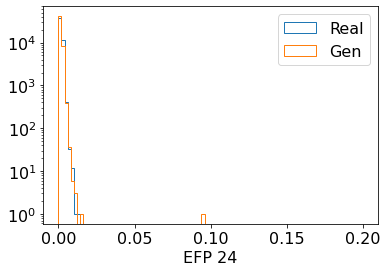

In [ ]:
_ = plt.hist(real_efps[:, 24], np.linspace(0, 0.2, 101), histtype='step', label="Real")
_ = plt.hist(gen_efps[:, 24], np.linspace(0, 0.2, 101), histtype='step', label="Gen")
plt.yscale('log')
plt.xlabel("EFP 24")
# plt.xscale('log')
# plt.ylabel(r"$\overline{\mathrm{FGD}}_{\infty}^{+\sigma}$")
_ = plt.legend()

In [ ]:
from scipy.optimize import curve_fit
from scipy.stats import linregress

def linear(x, intercept, slope):
    return intercept + slope * x

100%|██████████| 10/10 [02:41<00:00, 16.14s/it]


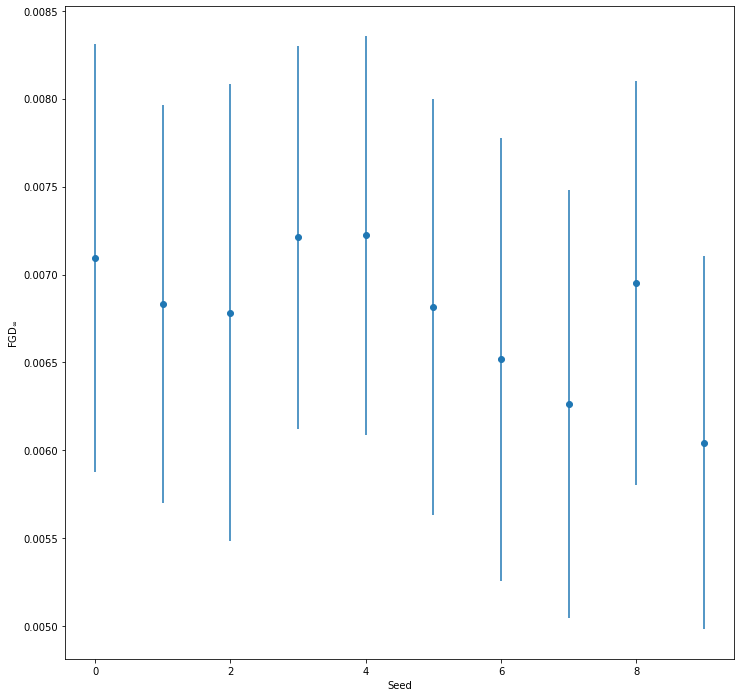

In [ ]:
numb = 10
nump = 200

means_ses = []
for i in tqdm(range(10)):
    res = gen_metrics.one_over_n_extrapolation_repeated_measurements(real_efps, gen_efps, gen_metrics.frechet_gaussian_distance, min_samples=5000, max_samples=50_000, num_batches=numb, num_points=nump, seed=i)
    means_ses.append([res[0], res[1]])

means_ses = np.array(means_ses)
plt.figure(figsize=(12, 12))
plt.errorbar(range(10), means_ses[:, 0], means_ses[:, 1], fmt="o")
plt.ylabel(r"FGD$_\infty$")
plt.xlabel("Seed")
plt.savefig(f"{plot_dir}/fgdinf_check_b{numb}_p{nump}_vb.pdf")

In [ ]:
numb = 10
nump = 200

res = gen_metrics.one_over_n_extrapolation_repeated_measurements(real_efps, gen_efps, gen_metrics.frechet_gaussian_distance, min_samples=5000, max_samples=50_000, num_batches=numb, num_points=nump, seed=0)

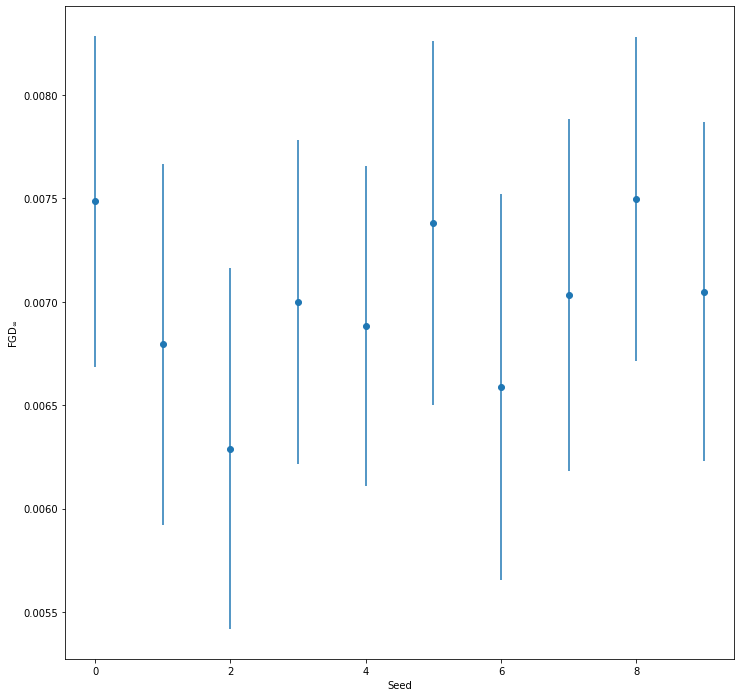

In [ ]:
means_ses = np.array(means_ses)
plt.figure(figsize=(12, 12))
plt.errorbar(range(10), means_ses[:, 0], means_ses[:, 1], fmt="o")
plt.ylabel(r"FGD$_\infty$")
plt.xlabel("Seed")
plt.savefig(f"{plot_dir}/fgdinf_check_b{numb}_p{nump}_vb.pdf")

In [ ]:
res = gen_metrics.one_over_n_extrapolation(real_efps, gen_efps, gen_metrics.frechet_gaussian_distance, min_samples=5_000, max_samples=25_000, num_batches=1, num_points=101, seed=1)
res

[-0.007852267142476775,
 0.0061213342358591655,
 array([ 5000,  5200,  5400,  5600,  5800,  6000,  6200,  6400,  6600,
         6800,  7000,  7200,  7400,  7600,  7800,  8000,  8200,  8400,
         8600,  8800,  9000,  9200,  9400,  9600,  9800, 10000, 10200,
        10400, 10600, 10800, 11000, 11200, 11400, 11600, 11800, 12000,
        12200, 12400, 12600, 12800, 13000, 13200, 13400, 13600, 13800,
        14000, 14200, 14400, 14600, 14800, 15000, 15200, 15400, 15600,
        15800, 16000, 16200, 16400, 16600, 16800, 17000, 17200, 17400,
        17600, 17800, 18000, 18200, 18400, 18600, 18800, 19000, 19200,
        19400, 19600, 19800, 20000, 20200, 20400, 20600, 20800, 21000,
        21200, 21400, 21600, 21800, 22000, 22200, 22400, 22600, 22800,
        23000, 23200, 23400, 23600, 23800, 24000, 24200, 24400, 24600,
        24800, 25000], dtype=int32),
 array([0.00235922, 0.09560776, 0.00388955, 0.00522308, 0.08261212,
        0.08481449, 0.00261556, 0.00331128, 0.07316306, 0.00343919

/var/folders/fh/cwyrvktn5bz76x4cpy_lbgnh0000gn/T/ipykernel_28474/3776030779.py:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(np.linspace(0, 50_000, 101), res[0][0] + res[0][1] * (1 / np.linspace(0, 50_000, 101)), color="red")


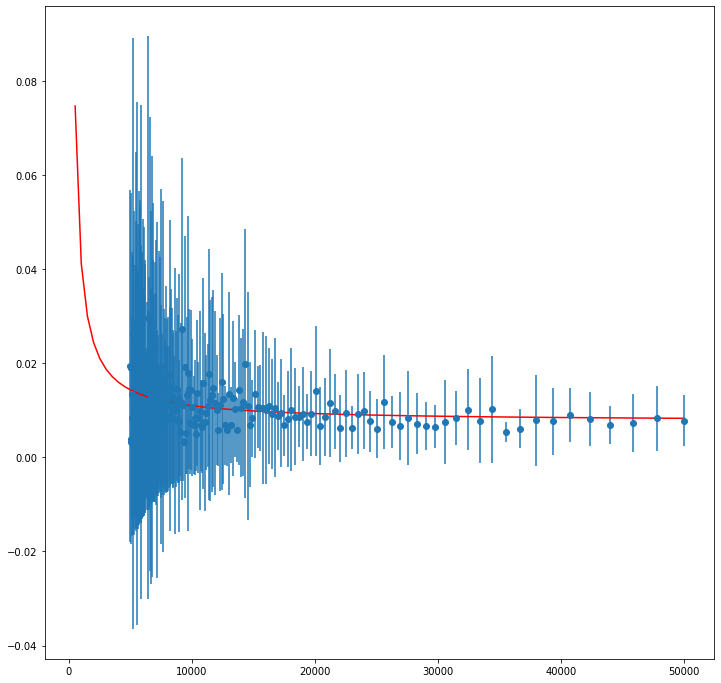

In [ ]:
plt.figure(figsize=(12, 12))
plt.errorbar(res[2], res[3][:, 0], res[3][:, 1], fmt="o")
plt.plot(np.linspace(0, 50_000, 101), res[0][0] + res[0][1] * (1 / np.linspace(0, 50_000, 101)), color="red")
# plt.legend()

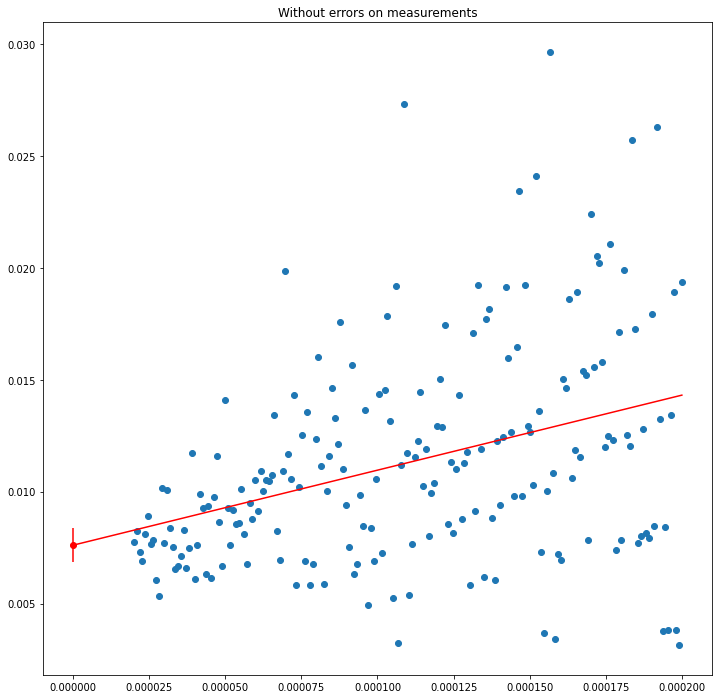

In [ ]:
plt.figure(figsize=(12, 12))
# plt.errorbar(1 / res[0], res[1][:, 0], res[1][:, 1], fmt="o")
plt.scatter(1 / res[2], res[3][:, 0])
plt.plot(np.linspace(0, 0.0002, 101), res[0][0] + res[0][1] * np.linspace(0, 0.0002, 101), label="Full Fit", color="red")
plt.errorbar(0, res[0][0], res[1][0], fmt="o", color="red")
plt.title("Without errors on measurements")
plt.savefig(f"{plot_dir}/fgdinf_fit_b{numb}_p{nump}.pdf")
# plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


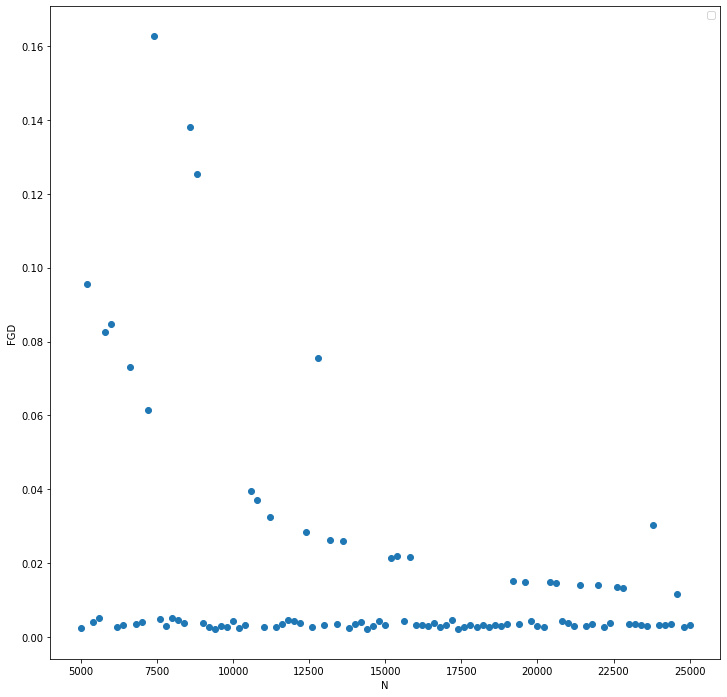

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(res[2], res[3])
# plt.plot(np.linspace(0, 0.0002, 101), res[0] + res[4] * np.linspace(0, 0.0002, 101), label="Full Fit", color="red")
# plt.plot(np.linspace(0, 0.0002, 101), val[0] + val[1] * np.linspace(0, 0.0002, 101), label="Averaged Fit", color="green")
# plt.errorbar(1 / np.mean(res[2][:-1].reshape(-1, 10), axis=1), np.mean(res[3][:-1].reshape(-1, 10), axis=1), np.std(res[3][:-1].reshape(-1, 10), axis=1), fmt="o", color="green")
# plt.errorbar(0, res[0], res[1], fmt="o", color="red")
# plt.errorbar(-0.000001, val[0], np.sqrt(np.diag(cov))[0], fmt="o", color="green")
plt.xlabel("N")
plt.ylabel("FGD")
plt.legend()

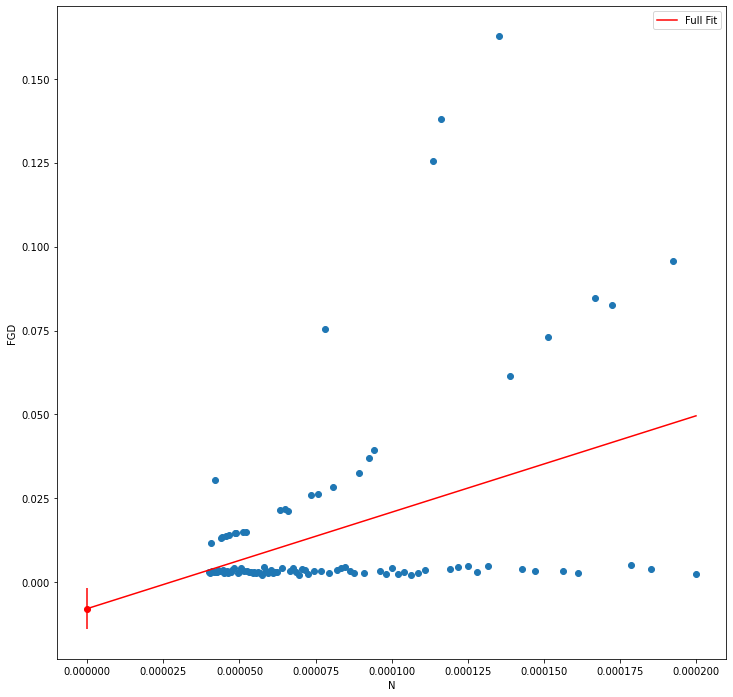

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(1 / res[2], res[3])
plt.plot(np.linspace(0, 0.0002, 101), res[0] + res[4] * np.linspace(0, 0.0002, 101), label="Full Fit", color="red")
# plt.plot(np.linspace(0, 0.0002, 101), val[0] + val[1] * np.linspace(0, 0.0002, 101), label="Averaged Fit", color="green")
# plt.errorbar(1 / np.mean(res[2][:-1].reshape(-1, 10), axis=1), np.mean(res[3][:-1].reshape(-1, 10), axis=1), np.std(res[3][:-1].reshape(-1, 10), axis=1), fmt="o", color="green")
plt.errorbar(0, res[0], res[1], fmt="o", color="red")
# plt.errorbar(-0.000001, val[0], np.sqrt(np.diag(cov))[0], fmt="o", color="green")
plt.xlabel("N")
plt.ylabel("FGD")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


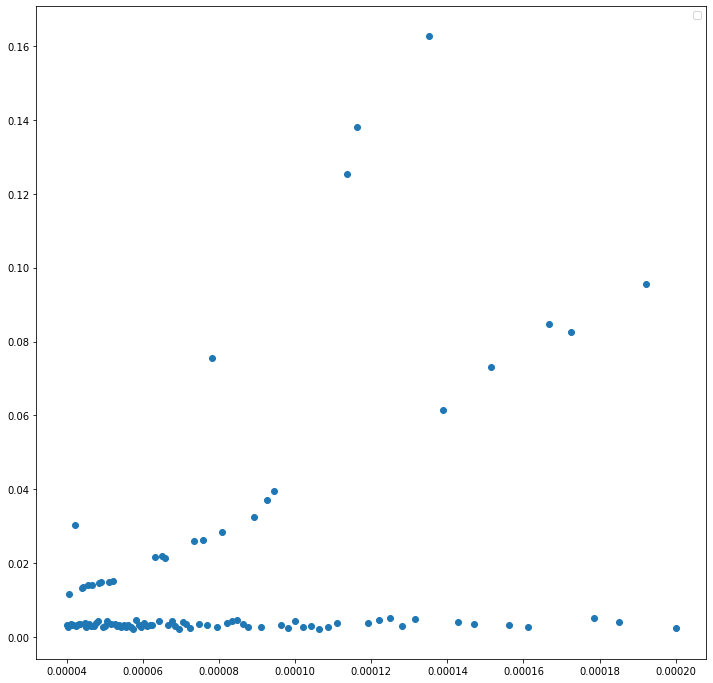

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(1 / res[2], res[3])
# plt.plot(np.linspace(0, 0.0002, 101), res[0] + res[4] * np.linspace(0, 0.0002, 101), label="Full Fit", color="red")
# plt.plot(np.linspace(0, 0.0002, 101), val[0] + val[1] * np.linspace(0, 0.0002, 101), label="Averaged Fit", color="green")
# plt.errorbar(1 / np.mean(res[2][:-1].reshape(-1, 10), axis=1), np.mean(res[3][:-1].reshape(-1, 10), axis=1), np.std(res[3][:-1].reshape(-1, 10), axis=1), fmt="o", color="green")
# plt.errorbar(0, res[0], res[1], fmt="o", color="red")
# plt.errorbar(-0.000001, val[0], np.sqrt(np.diag(cov))[0], fmt="o", color="green")
plt.legend()

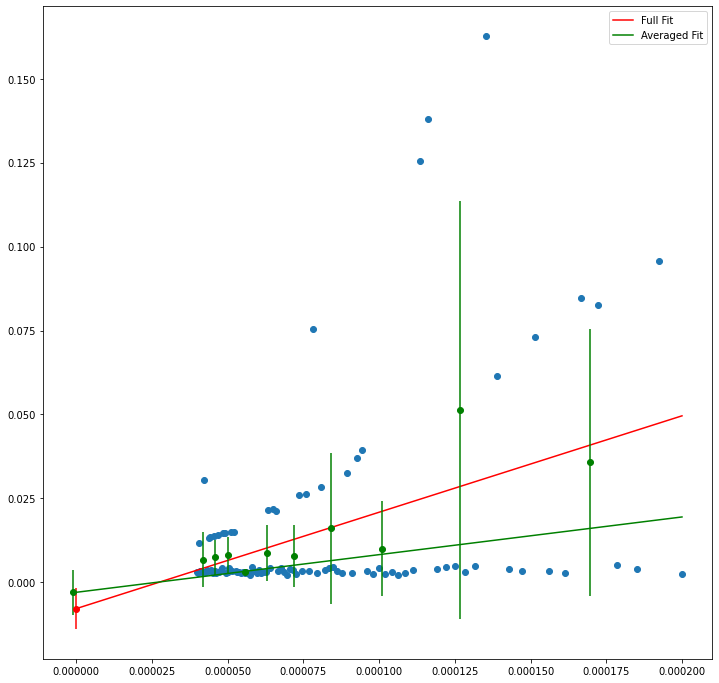

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(1 / res[2], res[3])
plt.plot(np.linspace(0, 0.0002, 101), res[0] + res[4] * np.linspace(0, 0.0002, 101), label="Full Fit", color="red")
plt.plot(np.linspace(0, 0.0002, 101), val[0] + val[1] * np.linspace(0, 0.0002, 101), label="Averaged Fit", color="green")
plt.errorbar(1 / np.mean(res[2][:-1].reshape(-1, 10), axis=1), np.mean(res[3][:-1].reshape(-1, 10), axis=1), np.std(res[3][:-1].reshape(-1, 10), axis=1), fmt="o", color="green")
plt.errorbar(0, res[0], res[1], fmt="o", color="red")
plt.errorbar(-0.000001, val[0], np.sqrt(np.diag(cov))[0], fmt="o", color="green")
plt.legend()

/var/folders/fh/cwyrvktn5bz76x4cpy_lbgnh0000gn/T/ipykernel_20213/1777573255.py:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(np.linspace(0, 50_000, 101), res[0] + res[4] * (1 / np.linspace(0, 50_000, 101)))


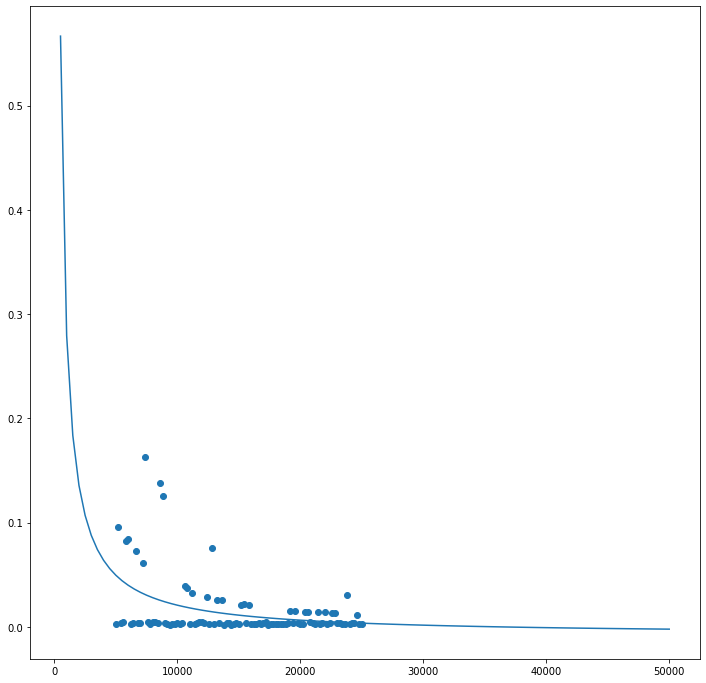

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(res[2], res[3])
plt.plot(np.linspace(0, 50_000, 101), res[0] + res[4] * (1 / np.linspace(0, 50_000, 101)))

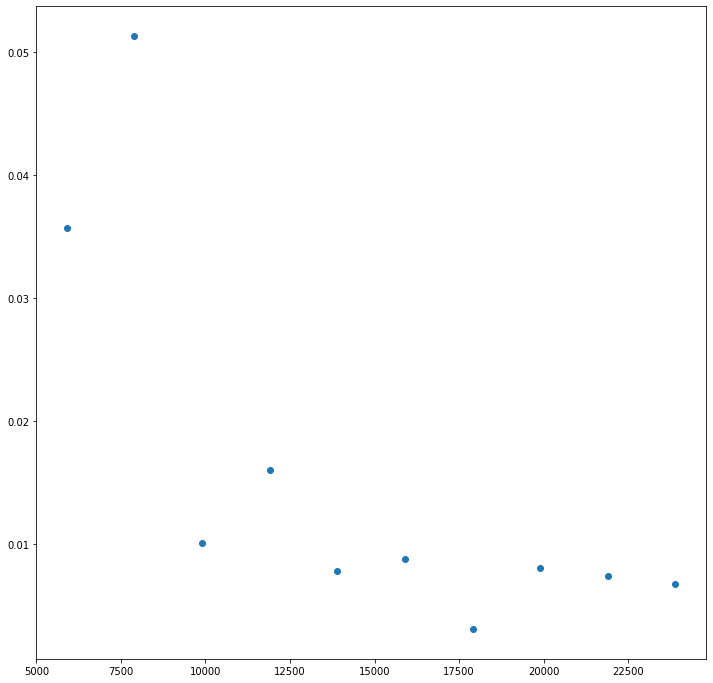

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(np.mean(res[2][:-1].reshape(-1, 10), axis=1), np.mean(res[3][:-1].reshape(-1, 10), axis=1))

<ErrorbarContainer object of 3 artists>

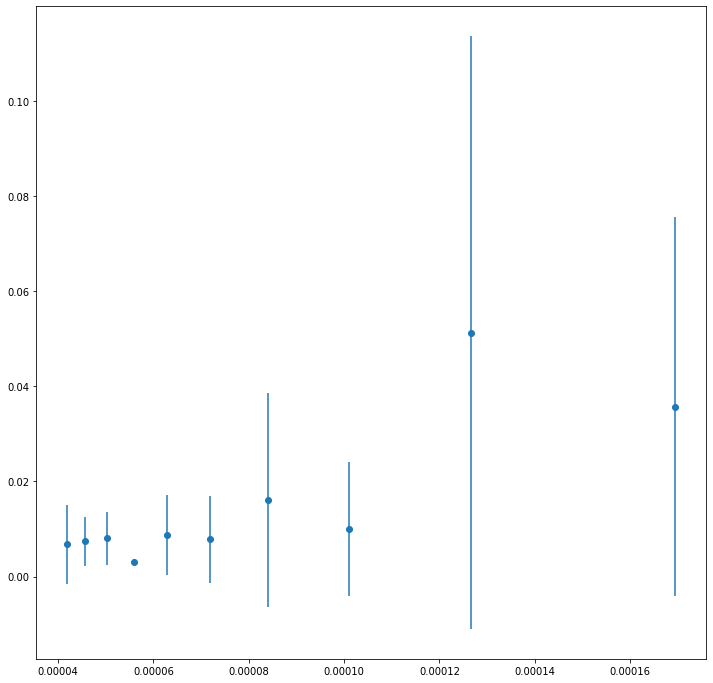

In [ ]:
plt.figure(figsize=(12, 12))
plt.errorbar(1 / np.mean(res[2][:-1].reshape(-1, 10), axis=1), np.mean(res[3][:-1].reshape(-1, 10), axis=1), np.std(res[3][:-1].reshape(-1, 10), axis=1), fmt="o")

In [ ]:
ms = []
for batch_size in tqdm(batch_sizes["fgd"][9:]):
    mean_std, timing = gen_metrics.multi_batch_evaluation(
        real_efps,
        gen_efps,
        5,
        batch_size,
        gen_metrics.frechet_gaussian_distance,
        timing=True,
        normalise=True
    )
    ms.append(mean_std)

100%|██████████| 9/9 [00:00<00:00, 12.89it/s]
